# Modelling and Evaluation

## import dependencies

In [71]:
import numpy as np
import pandas as pd
import tensorflow as tf
# import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# from PIL import Image

import matplotlib.pyplot as plt
import os
# import PIL
# import shutil
# import random
# import glob
# import itertools

## set up directories

In [72]:
os.chdir(os.path.expanduser('~'))
os.chdir('Desktop/skin')

train_dir = 'inputs/work/train'
test_dir = 'inputs/work/test'
val_dir = 'inputs/work/validate'

## Data Preprocessing

In [86]:
image_size = (224, 224)
batch_size = 32

# datagen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input)
datagen = ImageDataGenerator(zoom_range = 0.3, rotation_range = 90, horizontal_flip = True, vertical_flip = True)

train_batches = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

test_batches = datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

valid_batches = datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    classes=['akiec', 'mel', 'nv', 'bcc', 'df', 'vasc', 'bkl']
)

Found 3337 images belonging to 7 classes.
Found 1654 images belonging to 7 classes.
Found 1002 images belonging to 7 classes.


## Build CNN and Train
* This step can be skipped if a model has been trained previously.

In [74]:
model = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=7, activation='softmax'),
])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │     1,404,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,424,455 (5.43 MB)

 Trainable params: 1,424,391 (5.43 MB)

 Non-trainable params: 64 (256.00 B)

In [75]:
model.compile(optimizer= Adam(learning_rate = 0.0001), 
              loss= 'categorical_crossentropy', 
              metrics=['accuracy'])

Training step, can be time consuming. The trained model is saved, so predictions can be tested without retraining the model.

In [76]:
if os.path.exists('outputs/model.keras'):
    model = load_model('outputs/model.keras')
    print('Previous Model loaded')

model.fit(
    x=train_batches, 
    validation_data=valid_batches,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3)],
    epochs=10, 
    verbose=2)
model.save('outputs/model.keras')

Epoch 1/10
105/105 - 119s - 1s/step - accuracy: 0.4654 - loss: 1.8201 - val_accuracy: 0.5295 - val_loss: 1.2624
Epoch 2/10
105/105 - 117s - 1s/step - accuracy: 0.6227 - loss: 1.0355 - val_accuracy: 0.7282 - val_loss: 0.7682
Epoch 3/10
105/105 - 117s - 1s/step - accuracy: 0.7345 - loss: 0.7241 - val_accuracy: 0.7968 - val_loss: 0.5700
Epoch 4/10
105/105 - 112s - 1s/step - accuracy: 0.8382 - loss: 0.4860 - val_accuracy: 0.9176 - val_loss: 0.3334
Epoch 5/10
105/105 - 110s - 1s/step - accuracy: 0.8783 - loss: 0.3729 - val_accuracy: 0.9239 - val_loss: 0.2719
Epoch 6/10
105/105 - 111s - 1s/step - accuracy: 0.9158 - loss: 0.2824 - val_accuracy: 0.9341 - val_loss: 0.2340
Epoch 7/10
105/105 - 110s - 1s/step - accuracy: 0.9299 - loss: 0.2308 - val_accuracy: 0.9461 - val_loss: 0.2061
Epoch 8/10
105/105 - 110s - 1s/step - accuracy: 0.9461 - loss: 0.1899 - val_accuracy: 0.9853 - val_loss: 0.0926
Epoch 9/10
105/105 - 110s - 1s/step - accuracy: 0.9724 - loss: 0.1210 - val_accuracy: 0.9865 - val_loss:

### Model Evaluation

This step requires training the model, or there will be no history data.  

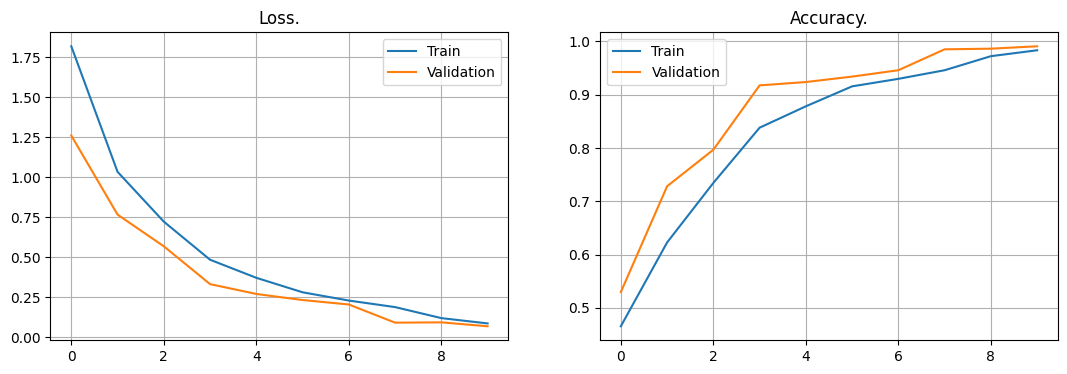

In [77]:
metrics = model.history.history

train_loss = metrics["loss"]
train_accuracy = metrics["accuracy"]

val_loss = metrics["val_loss"]
val_accuracy = metrics["val_accuracy"]

plt.figure(figsize = (13,4))
plt.subplot(1,2,1)
plt.title("Loss.")
plt.plot(train_loss, label = "Train");
plt.plot(val_loss, label = "Validation");
plt.grid(True)
plt.legend(loc = "best");

plt.subplot(1,2,2)
plt.title("Accuracy.")
plt.plot(train_accuracy, label = "Train");
plt.plot(val_accuracy, label = "Validation");
plt.grid(True)
plt.legend(loc = "best");

## Model Prediction

In [82]:
model = load_model('outputs/model.keras')

In [83]:
predictions = model.predict(x=test_batches, verbose=0)
np.round(predictions)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [84]:
true_labels = test_batches.classes
predicted_labels = np.argmax(predictions, axis=1)
class_names = {v: k for k, v in test_batches.class_indices.items()}
report = classification_report(true_labels, predicted_labels, target_names=class_names.values())
print(report)

              precision    recall  f1-score   support

       akiec       0.05      0.05      0.05       230
         mel       0.23      0.22      0.23       774
          nv       0.30      0.31      0.30      1001
         bcc       0.12      0.12      0.12       366
          df       0.03      0.03      0.03        79
        vasc       0.05      0.05      0.05        97
         bkl       0.22      0.22      0.22       790

    accuracy                           0.21      3337
   macro avg       0.14      0.14      0.14      3337
weighted avg       0.21      0.21      0.21      3337



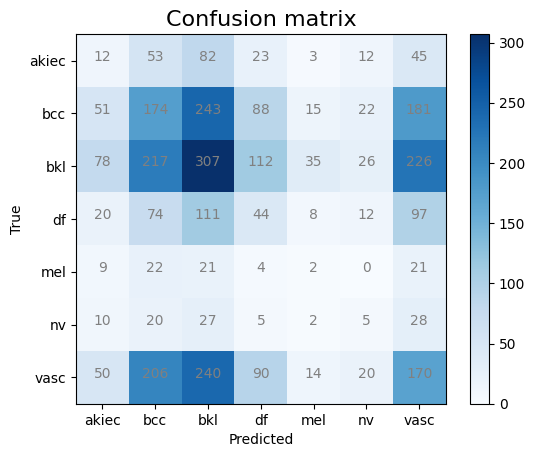

In [85]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
classes = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix', fontsize=16)
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.ylabel('True')
plt.xlabel('Predicted')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="gray")